In [1]:
%matplotlib inline

import os
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

/Users/mitchellsuter/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# View all available strategies
print(RunManager.get_run_names('StatArbStrategy2'))

         Run     RunDate Completed  \
0   run_0003  2018-01-08      True   
1   run_0004  2018-01-08      True   
2   run_0005  2018-01-08      True   
3   run_0006  2018-01-08      True   
4   run_0007  2018-01-09      True   
5   run_0008  2018-01-09      True   
6   run_0009  2018-01-09      True   
7   run_0010  2018-01-09      True   
8   run_0013  2018-01-10      True   
9   run_0014  2018-01-10      True   
10  run_0015  2018-01-10      True   
11  run_0016  2018-01-11      True   
12  run_0017  2018-01-11      True   
13  run_0018  2018-01-11      True   
14  run_0019  2018-01-11      True   
15  run_0020  2018-01-11      True   
16  run_0022  2018-01-11      True   
17  run_0023  2018-01-11      True   
18  run_0026  2018-01-11      True   
19  run_0027  2018-01-11      True   
20  run_0031  2018-01-11      True   
21  run_0032  2018-01-12      True   
22  run_0033  2018-01-18      True   
23  run_0035  2018-01-18      True   
24  run_0038  2018-01-18      True   
25  run_0041

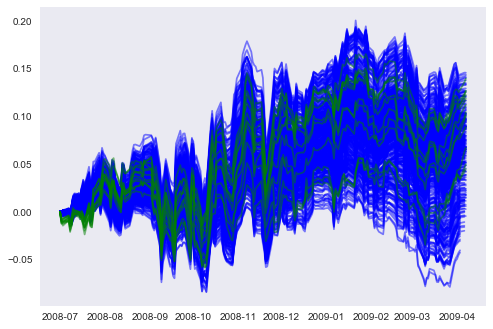

In [10]:
keep_params = [('model', str("{u'type': u'reg'}")), ('sort_signal_first', True)]
drop_params = [('sort_signal_first', False)]
rm1 = RunManager('StatArbStrategy2', 'run_0081', drop_params=drop_params, test_periods=0)
rm2 = RunManager('StatArbStrategy2', 'run_0077', test_periods=0)

rm1.import_return_frame()
rm2.import_return_frame()

plt.figure()
plt.plot(rm1.returns.cumsum(), 'b', alpha=.5)
inds = rm1.returns.index
plt.plot(rm2.returns.loc[inds].cumsum(), 'g', alpha=.5)

plt.grid()
plt.show()

In [12]:
param_analyze = rm1.analyze_parameters()

In [13]:
param_analyze

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,150,0.054348,0.026543,-999.0
1,holding_period,4,150,0.065591,0.032880,-999.0
2,holding_period,5,150,0.076916,0.039771,-999.0
3,model,"{u'max_features': 0.5, u'type': u'tree', u'min...",90,0.056539,0.028547,-999.0
4,model,"{u'max_features': 0.5, u'type': u'tree', u'min...",90,0.073859,0.037920,-999.0
5,model,"{u'max_features': 0.8, u'type': u'tree', u'min...",90,0.062744,0.031701,-999.0
6,model,"{u'max_features': 0.8, u'type': u'tree', u'min...",90,0.063162,0.032517,-999.0
7,model,{u'type': u'reg'},90,0.071789,0.034638,-999.0
8,response_days,10,225,0.066197,0.033077,-999.0
9,response_days,5,225,0.065040,0.033052,-999.0


In [15]:
for x in param_analyze.Val[3:7]:
    print x

{u'max_features': 0.5, u'type': u'tree', u'min_samples_leaf': 2000}
{u'max_features': 0.5, u'type': u'tree', u'min_samples_leaf': 500}
{u'max_features': 0.8, u'type': u'tree', u'min_samples_leaf': 2000}
{u'max_features': 0.8, u'type': u'tree', u'min_samples_leaf': 500}


In [31]:
comb = CombinationSearch()
comb.add_run(rm1)
comb.start(10, criteria='mean')

  0%|          | 0/10 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 10/10 [00:24<00:00,  2.27s/it]


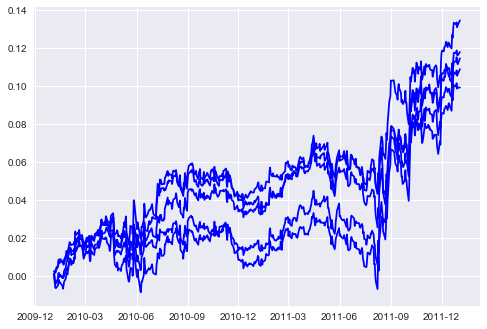

In [32]:
x2 = comb.best_results_rets.dropna()
plt.figure()
plt.plot(x2.cumsum(), 'b')
plt.show()